In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados_bruto = pd.read_csv('C:/Users/Rafael/Desktop/Portfolio/House_Prices_Brazil/houses_to_rent_v2.csv')

In [3]:
dados_bruto.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
a_renomear = {
    'city' : 'cidade',
    'rooms' : 'quartos',
    'bathroom' : 'banheiros',
    'parking spaces' : 'estacionamento',
    'floor' : 'andar',
    'furniture': 'mobiliado',
    'hoa (R$)' : 'hoa',
    'rent amount (R$)' : 'valor_aluguel',
    'property tax (R$)' : 'imposto',
    'fire insurance (R$)' : 'seguro_fogo',
    'total (R$)' : 'total'
    
    
}
dados_bruto = dados_bruto.rename(columns = a_renomear)
dados_bruto.head()

,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobiliado,hoa,valor_aluguel,imposto,seguro_fogo,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [5]:
# transformar os dados categoricos em numericos
dados_bruto['animal'].replace('acept',1,inplace=True)
dados_bruto['animal'].replace('not acept',0,inplace=True)
dados_bruto['mobiliado'].replace('furnished', 1 ,inplace=True)
dados_bruto['mobiliado'].replace('not furnished', 0 ,inplace=True)

In [6]:
dados_bruto.cidade.value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: cidade, dtype: int64

In [7]:
# Mudar as cidades para categorias Númericas e utilizalas no modelo 
dados_bruto['cidade'].replace('São Paulo', 1,inplace = True)
dados_bruto['cidade'].replace('Rio de Janeiro', 2,inplace = True)
dados_bruto['cidade'].replace('Belo Horizonte', 3,inplace = True)
dados_bruto['cidade'].replace('Porto Alegre', 4,inplace = True)
dados_bruto['cidade'].replace('Campinas', 5,inplace = True)

In [8]:
dados_bruto.head()

,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobiliado,hoa,valor_aluguel,imposto,seguro_fogo,total
0,1,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,1,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,4,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,4,51,2,1,0,2,1,0,270,1112,22,17,1421
4,1,25,1,1,0,1,0,0,0,800,25,11,836


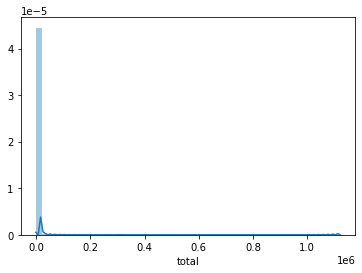

In [9]:
sns.distplot(dados_bruto['total'])

In [10]:
dados_bruto.query("total > 50000")

,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobiliado,hoa,valor_aluguel,imposto,seguro_fogo,total
255,3,155,1,4,0,4,0,0,1117000,2790,64,38,1120000
2182,1,700,4,7,8,-,1,0,0,45000,8750,677,54430
2859,1,285,4,5,4,6,1,1,200000,20000,1834,254,222100
2928,2,35,1,1,0,1,1,1,81150,4500,9900,58,95610
6230,1,340,5,4,2,7,1,0,220000,12000,1000,153,233200
6645,1,42,1,2,1,6,0,0,690,2500,313700,32,316900
6979,3,155,1,4,0,4,0,0,1117000,2790,64,38,1120000


### Achamos alguns erros talvez de digitação ou talvez do próprio dataset de qualquer jeito estes valores serão retirados por não fazerem sentido com o dataset

In [11]:
dados_bruto.drop([255, 2859,6230,6645,6979,2928,2182], inplace = True)

In [12]:
dados_bruto.query("total > 50000")

,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobiliado,hoa,valor_aluguel,imposto,seguro_fogo,total


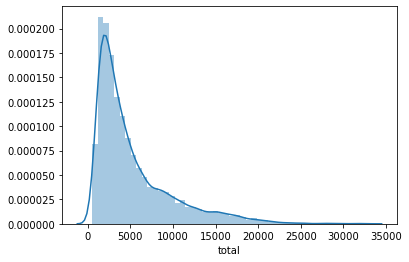

In [13]:
sns.distplot(dados_bruto.total)

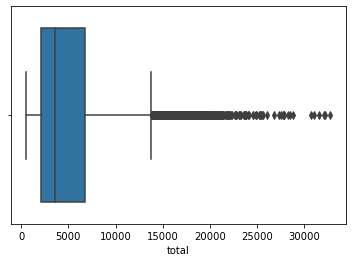

In [14]:
sns.boxplot(dados_bruto.total)

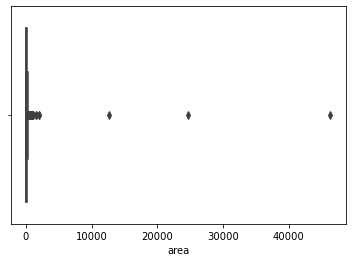

In [15]:
sns.boxplot(dados_bruto.area)

In [16]:
dados_bruto.query('area > 20000')

,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobiliado,hoa,valor_aluguel,imposto,seguro_fogo,total
2397,3,46335,4,8,5,11,1,1,960,8500,646,114,10220
5915,1,24606,5,4,4,12,1,0,2254,8100,7859,103,18320


In [17]:
dados_bruto.drop([2397,5915,9241], inplace = True)

In [18]:
dados_bruto.query('area > 10000')

,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobiliado,hoa,valor_aluguel,imposto,seguro_fogo,total


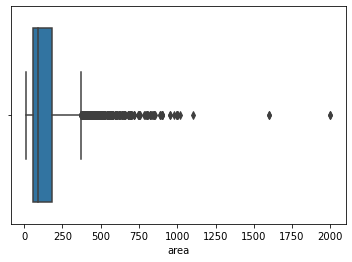

In [19]:
sns.boxplot(dados_bruto.area)

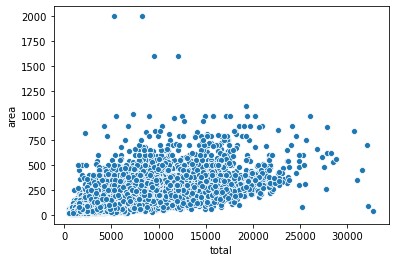

In [20]:
sns.scatterplot(x = 'total', y = 'area', data= dados_bruto)

In [21]:
dados_bruto.describe()

,cidade,area,quartos,banheiros,estacionamento,animal,mobiliado,hoa,valor_aluguel,imposto,seguro_fogo,total
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,2.029489,141.364258,2.505711,2.235068,1.608407,0.777851,0.243681,918.637521,3889.804812,334.852088,53.211477,5196.694439
std,1.353518,134.255040,1.170677,1.405273,1.588065,0.415711,0.429322,1167.068076,3381.690758,673.960051,47.350070,4471.857327
min,1.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,3.000000,499.000000
25%,1.000000,56.000000,2.000000,1.000000,0.000000,1.000000,0.000000,170.000000,1529.250000,38.000000,21.000000,2060.250000
50%,1.000000,90.000000,2.000000,2.000000,1.000000,1.000000,0.000000,559.000000,2650.000000,125.000000,36.000000,3577.500000
75%,3.000000,182.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1234.500000,5000.000000,375.000000,68.000000,6757.000000
max,5.000000,2000.000000,13.000000,10.000000,12.000000,1.000000,1.000000,32000.000000,30000.000000,28120.000000,451.000000,32750.000000


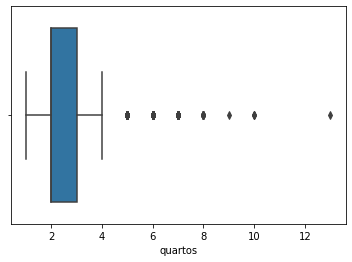

In [22]:
sns.boxplot(dados_bruto.quartos)

In [23]:
dados_bruto.quartos.min()

1

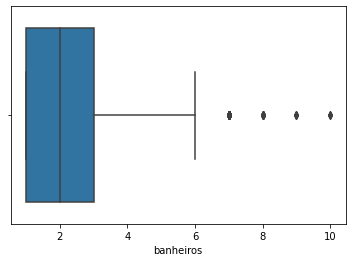

In [24]:
sns.boxplot(dados_bruto.banheiros)

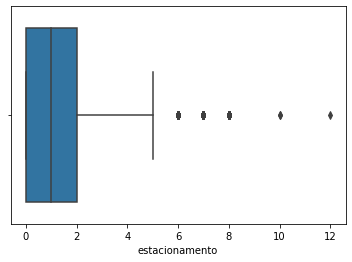

In [25]:
sns.boxplot(dados_bruto.estacionamento)

In [26]:
dados_bruto.andar.value_counts()

-      2460
1      1080
2       985
3       930
4       746
5       600
6       537
7       496
8       490
9       369
10      357
11      302
12      256
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
23       25
25       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
51        1
301       1
35        1
46        1
Name: andar, dtype: int64

In [27]:
dados_bruto.andar.replace('-', 0, inplace=True)
dados_bruto.andar = pd.to_numeric(dados_bruto.andar)
dados_bruto.andar.value_counts()

0      2460
1      1080
2       985
3       930
4       746
5       600
6       537
7       496
8       490
9       369
10      357
11      302
12      256
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
25       25
23       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
51        1
301       1
46        1
35        1
Name: andar, dtype: int64

In [28]:
dados_bruto.query('andar > 30').head(20)

,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobiliado,hoa,valor_aluguel,imposto,seguro_fogo,total
671,1,250,3,2,3,35,1,1,2500,15000,1084,191,18780
1654,1,353,4,5,5,46,1,0,3000,10000,0,127,13130
2562,3,80,3,2,2,301,1,0,750,2600,164,35,3549
5694,5,64,2,2,2,51,1,0,800,1900,129,25,2854
6096,1,84,2,3,2,32,0,1,850,8500,450,108,9908
10179,1,51,1,1,0,32,0,0,429,3250,37,42,3758


### Foi encontrado 2 variaveis sem sentido em Andar um prédio de mais de 300 andares o que é impossivel e em campinas um prédio de 51 que também é impossivel já que em campinas apenas existem prédios menores

In [29]:
dados_bruto.drop([2562,5694], inplace = True)

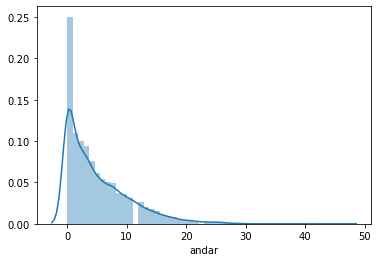

In [30]:
sns.distplot(dados_bruto.andar)

# Coeficiente Quadratico

In [31]:
def erro_quadrado_medio(previsto, y):
    return np.array([(y_test - predicts)**2 for y_test, predicts in zip(y,previsto)]).mean()

# Utilizando Log para os dados fiarem em uma mesma escala e mais lineares

In [32]:
dados_log = pd.DataFrame()

dados_log['area'] = np.log(dados_bruto['area'])
dados_log['quartos'] = np.log(dados_bruto['quartos'])
dados_log['banheiros'] = np.log(dados_bruto['banheiros'] + 1)
dados_log['estacionamento'] = np.log(dados_bruto['estacionamento']+1)
dados_log['andar'] = np.log(dados_bruto['andar'] +1)
dados_log['cidade'] = np.log(dados_bruto['cidade'])
dados_log['animal'] = np.log(dados_bruto['animal'] +1)
dados_log['mobiliado'] = np.log(dados_bruto['mobiliado'] +1)

dados_log['total'] = np.log(dados_bruto['total'])

In [33]:
dados_log.head()

,area,quartos,banheiros,estacionamento,andar,cidade,animal,mobiliado,total
0,4.248495,0.693147,0.693147,0.693147,2.079442,0.000000,0.693147,0.693147,8.633731
1,5.768321,1.386294,1.609438,0.000000,3.044522,0.000000,0.693147,0.000000,8.983816
2,4.382027,0.000000,0.693147,0.693147,1.945910,1.386294,0.693147,0.000000,8.253488
3,3.931826,0.693147,0.693147,0.000000,1.098612,1.386294,0.693147,0.000000,7.259116
4,3.218876,0.000000,0.693147,0.000000,0.693147,0.000000,0.000000,0.000000,6.728629


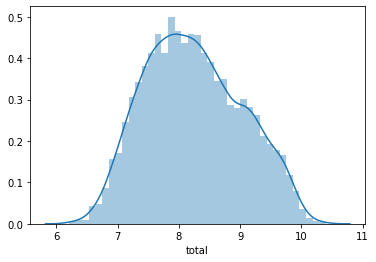

In [34]:
sns.distplot(dados_log.total)

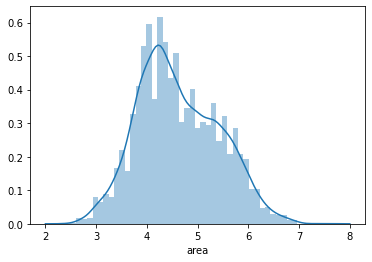

In [35]:
sns.distplot(dados_log.area)

# Utilizando uma TreeRegresion

0.6019276881149795

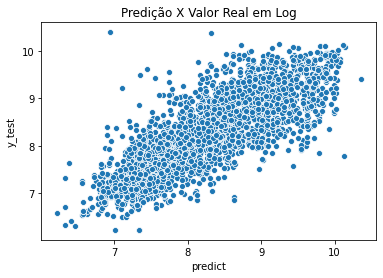

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score


X = dados_log[['cidade','area', 'quartos', 'banheiros', 'estacionamento', 'andar','animal','mobiliado']]
Y = dados_log["total"]

X_train, X_test, y_train, y_test = train_test_split(X,Y)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = DecisionTreeRegressor()
model.fit(X_train_scaled, y_train)

predicts = model.predict(X_test_scaled)

dataset_results = pd.DataFrame()
dataset_results['predict'] = predicts
dataset_results['y_test'] = y_test.values

ax = sns.scatterplot(x = 'predict', y = 'y_test', data=dataset_results)
ax.set_title('Predição X Valor Real em Log')
r2_score(y_test,predicts)

In [37]:
print('O coeficiente do quadrado médio é: ', erro_quadrado_medio(predicts, y_test))

O coeficiente do quadrado médio é:  0.2571228209500958


In [38]:
dataset_results.head(20)

,predict,y_test
0,8.203578,8.867568
1,9.910960,9.949416
2,8.204945,7.997327
3,8.283999,7.724447
4,6.804615,7.018402
5,8.447843,8.838262
6,7.882692,7.640604
7,7.156956,7.156956
8,7.811973,7.927685
9,8.956866,8.584665


In [39]:
dataset_results.predict = np.exp(dataset_results.predict)
dataset_results.y_test = np.exp(dataset_results.y_test)
dataset_results['erro'] = dataset_results.y_test - dataset_results.predict
dataset_results

,predict,y_test,erro
0,3654.0,7098.0,3444.0
1,20150.0,20940.0,790.0
2,3659.0,2973.0,-686.0
3,3960.0,2263.0,-1697.0
4,902.0,1117.0,215.0
...,...,...,...
2665,7806.0,6511.0,-1295.0
2666,1835.0,1835.0,0.0
2667,10170.0,8155.0,-2015.0
2668,1998.0,2854.0,856.0


Text(0.5, 1.0, 'Predição X valor real (R$)')

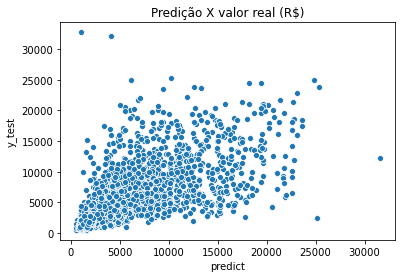

In [40]:
ax = sns.scatterplot(x = 'predict', y = 'y_test', data = dataset_results)
ax.set_title('Predição X valor real (R$)')

## Utilizando outros modelos 

# Linear Regression

In [41]:
dados_log.corr()

,area,quartos,banheiros,estacionamento,andar,cidade,animal,mobiliado,total
area,1.000000,0.814113,0.819591,0.695963,-0.183472,-0.105543,0.180505,-0.038756,0.741746
quartos,0.814113,1.000000,0.732466,0.612584,-0.129316,-0.048364,0.195029,-0.103408,0.588153
banheiros,0.819591,0.732466,1.000000,0.686262,-0.070112,-0.165224,0.131616,0.012221,0.738088
estacionamento,0.695963,0.612584,0.686262,1.000000,-0.056449,-0.132920,0.135163,0.004695,0.628471
andar,-0.183472,-0.129316,-0.070112,-0.056449,1.000000,-0.057307,-0.026629,0.142384,0.141291
cidade,-0.105543,-0.048364,-0.165224,-0.132920,-0.057307,1.000000,0.047555,-0.082786,-0.331974
animal,0.180505,0.195029,0.131616,0.135163,-0.026629,0.047555,1.000000,-0.088469,0.092221
mobiliado,-0.038756,-0.103408,0.012221,0.004695,0.142384,-0.082786,-0.088469,1.000000,0.210764
total,0.741746,0.588153,0.738088,0.628471,0.141291,-0.331974,0.092221,0.210764,1.000000


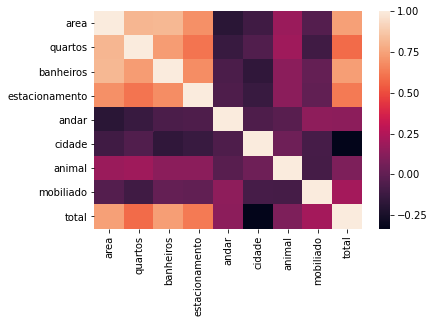

In [42]:
corr = dados_log.corr()
sns.heatmap(corr)

## LinearRegression

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression


X = dados_log[['cidade','area', 'quartos', 'banheiros', 'estacionamento', 'andar','animal','mobiliado']]
Y = dados_log["total"]

X_train, X_test, y_train, y_test = train_test_split(X,Y)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

predicts = model.predict(X_test_scaled)

dataset_results = pd.DataFrame()
dataset_results['predict'] = predicts
dataset_results['y_test'] = y_test.values
dataset_results['erro'] = dataset_results.y_test - dataset_results.predict

r2_score(y_test,predicts)

0.7489842485178694

In [44]:
print('O coeficiente do quadrado médio é: ', erro_quadrado_medio(predicts, y_test))

O coeficiente do quadrado médio é:  0.1540257095583635


## Ajeitando resultados pois estao em log E 

In [45]:
dataset_results.head(10)

,predict,y_test,erro
0,9.259095,9.780755,0.521659
1,8.991009,9.591513,0.600504
2,8.674268,8.723231,0.048963
3,8.092268,8.184793,0.092524
4,9.156960,9.707473,0.550513
5,8.181075,8.261010,0.079935
6,7.643159,7.259820,-0.383340
7,8.601698,8.562931,-0.038767
8,7.753011,8.136226,0.383215
9,8.082458,7.641084,-0.441373


In [46]:

dataset_results.predict = np.exp(dataset_results.predict)
dataset_results.y_test = np.exp(dataset_results.y_test)
dataset_results['erro'] = dataset_results.y_test - dataset_results.predict
dataset_results

,predict,y_test,erro
0,10499.631329,17690.0,7190.368671
1,8030.553253,14640.0,6609.446747
2,5850.418191,6144.0,293.581809
3,3269.094483,3586.0,316.905517
4,9480.192714,16440.0,6959.807286
...,...,...,...
2665,2360.134763,1621.0,-739.134763
2666,5906.667336,5773.0,-133.667336
2667,2493.514321,3037.0,543.485679
2668,2850.896925,3002.0,151.103075


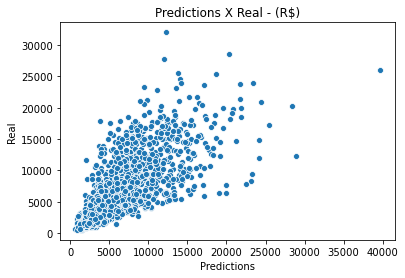

In [51]:

ax = sns.scatterplot(x = 'predict', y = 'y_test', data = dataset_results, )
ax.set_title('Predictions X Real - (R$)')
ax.set_xlabel('Predictions')
ax.set_ylabel('Real')
ax =ax